<a href="https://colab.research.google.com/github/PatrickRuan/2nd-ML100Days/blob/master/Day100_transfer_learning_HW%E7%9A%84%E5%89%AF%E6%9C%AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 作業
礙於不是所有同學都有 GPU ，這邊的範例使用的是簡化版本的 ResNet，確保所有同學都能夠順利訓練!


最後一天的作業請閱讀這篇非常詳盡的[文章](https://blog.gtwang.org/programming/keras-resnet-50-pre-trained-model-build-dogs-cats-image-classification-system/)，基本上已經涵蓋了所有訓練　CNN 常用的技巧，請使用所有學過的訓練技巧，盡可能地提高 Cifar-10 的 test data 準確率，截圖你最佳的結果並上傳來完成最後一次的作業吧!

另外這些技巧在 Kaggle 上也會被許多人使用，更有人會開發一些新的技巧，例如使把預訓練在 ImageNet 上的模型當成 feature extractor 後，再拿擷取出的特徵重新訓練新的模型，這些技巧再進階的課程我們會在提到，有興趣的同學也可以[參考](https://www.kaggle.com/insaff/img-feature-extraction-with-pretrained-resnet)

In [2]:
from google.colab import drive
drive.mount('/content/drive')
!ls

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive
drive  sample_data


In [0]:
root = 'drive/My Drive/'

In [4]:
from keras.datasets import cifar10
from keras.utils import to_categorical

Using TensorFlow backend.


In [5]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170500096/170498071 [==============================] - 11s 0us/step


In [6]:
print(f'x_train.shape, {x_train.shape}, \ny_train.shape, {y_train.shape},\nx_text.shape, {x_test.shape},\nwe have 50K train data, 10K test data, target is 1 dim')

x_train.shape, (50000, 32, 32, 3), 
y_train.shape, (50000, 1),
x_text.shape, (10000, 32, 32, 3),
we have 50K train data, 10K test data, target is 1 dim


In [7]:
x_train=x_train/255.
x_test=x_test/255.
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)


print(f'x_train.shape, {x_train.shape}, \ny_train.shape, {y_train.shape},\nx_text.shape, {x_test.shape},\nwe have 50K train data, 10K test data, target is 10 dim')


x_train.shape, (50000, 32, 32, 3), 
y_train.shape, (50000, 10),
x_text.shape, (10000, 32, 32, 3),
we have 50K train data, 10K test data, target is 10 dim


In [0]:
from tensorflow.python.keras import backend as K
from tensorflow.python.keras.models import Model
from tensorflow.python.keras.layers import Flatten, Dense, Dropout
from tensorflow.python.keras.applications.resnet50 import ResNet50
from tensorflow.python.keras.optimizers import Adam
from tensorflow.python.keras.preprocessing.image import ImageDataGenerator

# 影像大小
IMAGE_SIZE = (32, 32)

# 影像類別數
NUM_CLASSES = 10

# 若 GPU 記憶體不足，可調降 batch size 或凍結更多層網路
BATCH_SIZE = 8

# 凍結網路層數
FREEZE_LAYERS = 2

# Epoch 數
NUM_EPOCHS = 10

# 模型輸出儲存的檔案
WEIGHTS_FINAL = root+'ColabOK/model-resnet50-final.h5'



# 以訓練好的 ResNet50 為基礎來建立模型，
# 捨棄 ResNet50 頂層的 fully connected layers
net = ResNet50(include_top=False, weights='imagenet', input_tensor=None,
               input_shape=(IMAGE_SIZE[0],IMAGE_SIZE[1],3))
x = net.output
x = Flatten()(x)
x = Dense(256,activation='relu')(x)

# 增加 DropOut layer
x = Dropout(0.5)(x)

# 增加 Dense layer，以 softmax 產生個類別的機率值
output_layer = Dense(NUM_CLASSES, activation='softmax', name='softmax')(x)

# 設定凍結與要進行訓練的網路層
net_final = Model(inputs=net.input, outputs=output_layer)
for layer in net_final.layers[:FREEZE_LAYERS]:
    layer.trainable = False
for layer in net_final.layers[FREEZE_LAYERS:]:
    layer.trainable = True

# 使用 Adam optimizer，以較低的 learning rate 進行 fine-tuning
final.compile(optimizer=Adam(lr=1e-5),
                  loss='categorical_crossentropy', metrics=['accuracy'])

# 輸出整個網路結構
#print(net_final.summary())

# 訓練模型
history= net_final.fit(x_train,y_train, epochs=NUM_EPOCHS, batch_size=512, validation_split=0.2, verbose=1)

# 儲存訓練好的模型
net_final.save(WEIGHTS_FINAL)

In [0]:
import matplotlib.pyplot as plt
def call_history(history):
  acc = history.history['acc']
  val_acc = history.history['val_acc']
  loss = history.history['loss']
  val_loss = history.history['val_loss']
  epochs = range(len(acc))
  plt.plot(epochs, acc, label='Training acc')
  plt.plot(epochs, val_acc, label='Validation acc')
  plt.title('Training and validation accuracy')
  plt.legend()
  plt.figure()
  plt.plot(epochs, loss, label='Training loss')
  plt.plot(epochs, val_loss, label='Validation loss')
  plt.title('Training and validation loss')
  plt.legend()
  plt.show()

start 11
Train on 40000 samples, validate on 10000 samples
Epoch 1/10
40000/40000 [==============================] - 45s 1ms/sample - loss: 1.4119 - acc: 0.5161 - val_loss: 2.0444 - val_acc: 0.2856
Epoch 2/10
40000/40000 [==============================] - 45s 1ms/sample - loss: 1.3272 - acc: 0.5476 - val_loss: 1.7592 - val_acc: 0.3901
Epoch 3/10
40000/40000 [==============================] - 45s 1ms/sample - loss: 1.2408 - acc: 0.5757 - val_loss: 1.5026 - val_acc: 0.4936
Epoch 4/10
40000/40000 [==============================] - 45s 1ms/sample - loss: 1.1687 - acc: 0.5994 - val_loss: 1.3190 - val_acc: 0.5512
Epoch 5/10
40000/40000 [==============================] - 45s 1ms/sample - loss: 1.0941 - acc: 0.6264 - val_loss: 1.2305 - val_acc: 0.5867
Epoch 6/10
40000/40000 [==============================] - 45s 1ms/sample - loss: 1.0348 - acc: 0.6464 - val_loss: 1.1748 - val_acc: 0.6057
Epoch 7/10
40000/40000 [==============================] - 45s 1ms/sample - loss: 0.9758 - acc: 0.6678 - val

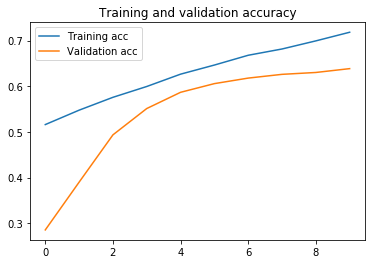

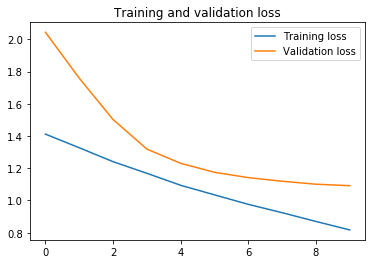

start 21
Train on 40000 samples, validate on 10000 samples
Epoch 1/10
40000/40000 [==============================] - 45s 1ms/sample - loss: 0.7741 - acc: 0.7337 - val_loss: 1.0754 - val_acc: 0.6431
Epoch 2/10
40000/40000 [==============================] - 45s 1ms/sample - loss: 0.7290 - acc: 0.7503 - val_loss: 1.0668 - val_acc: 0.6485
Epoch 3/10
40000/40000 [==============================] - 45s 1ms/sample - loss: 0.6849 - acc: 0.7680 - val_loss: 1.0604 - val_acc: 0.6527
Epoch 4/10
40000/40000 [==============================] - 45s 1ms/sample - loss: 0.6375 - acc: 0.7815 - val_loss: 1.0575 - val_acc: 0.6550
Epoch 5/10
40000/40000 [==============================] - 45s 1ms/sample - loss: 0.6007 - acc: 0.7967 - val_loss: 1.0527 - val_acc: 0.6584
Epoch 6/10
40000/40000 [==============================] - 45s 1ms/sample - loss: 0.5610 - acc: 0.8101 - val_loss: 1.0517 - val_acc: 0.6596
Epoch 7/10
40000/40000 [==============================] - 45s 1ms/sample - loss: 0.5271 - acc: 0.8199 - val

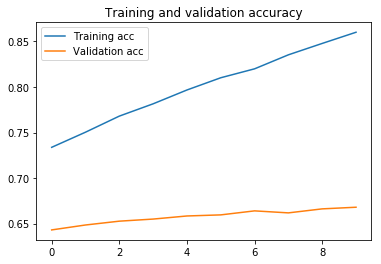

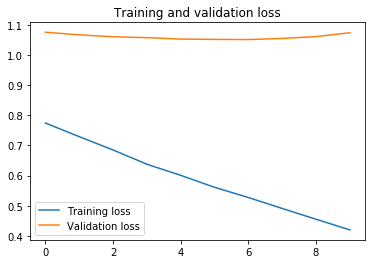

start 31
Train on 40000 samples, validate on 10000 samples
Epoch 1/10
40000/40000 [==============================] - 45s 1ms/sample - loss: 0.3948 - acc: 0.8692 - val_loss: 1.0845 - val_acc: 0.6709
Epoch 2/10
40000/40000 [==============================] - 45s 1ms/sample - loss: 0.3633 - acc: 0.8808 - val_loss: 1.0912 - val_acc: 0.6699
Epoch 3/10
40000/40000 [==============================] - 45s 1ms/sample - loss: 0.3320 - acc: 0.8906 - val_loss: 1.1015 - val_acc: 0.6747
Epoch 4/10
40000/40000 [==============================] - 45s 1ms/sample - loss: 0.3099 - acc: 0.9000 - val_loss: 1.1122 - val_acc: 0.6758
Epoch 5/10
40000/40000 [==============================] - 45s 1ms/sample - loss: 0.2857 - acc: 0.9088 - val_loss: 1.1262 - val_acc: 0.6773
Epoch 6/10
40000/40000 [==============================] - 45s 1ms/sample - loss: 0.2670 - acc: 0.9144 - val_loss: 1.1508 - val_acc: 0.6779
Epoch 7/10
40000/40000 [==============================] - 45s 1ms/sample - loss: 0.2441 - acc: 0.9234 - val

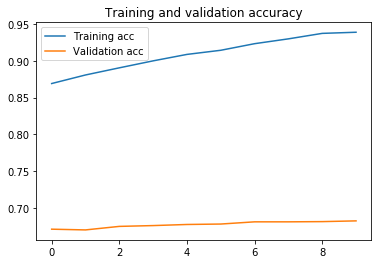

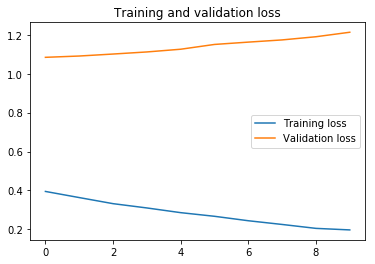

start 41
Train on 40000 samples, validate on 10000 samples
Epoch 1/10
40000/40000 [==============================] - 45s 1ms/sample - loss: 0.1767 - acc: 0.9457 - val_loss: 1.2309 - val_acc: 0.6822
Epoch 2/10
40000/40000 [==============================] - 45s 1ms/sample - loss: 0.1639 - acc: 0.9512 - val_loss: 1.2496 - val_acc: 0.6828
Epoch 3/10
40000/40000 [==============================] - 45s 1ms/sample - loss: 0.1518 - acc: 0.9549 - val_loss: 1.2654 - val_acc: 0.6826
Epoch 4/10
40000/40000 [==============================] - 45s 1ms/sample - loss: 0.1369 - acc: 0.9605 - val_loss: 1.2868 - val_acc: 0.6837
Epoch 5/10
40000/40000 [==============================] - 45s 1ms/sample - loss: 0.1277 - acc: 0.9632 - val_loss: 1.3116 - val_acc: 0.6826
Epoch 6/10
40000/40000 [==============================] - 45s 1ms/sample - loss: 0.1184 - acc: 0.9672 - val_loss: 1.3240 - val_acc: 0.6832
Epoch 7/10
40000/40000 [==============================] - 45s 1ms/sample - loss: 0.1100 - acc: 0.9696 - val

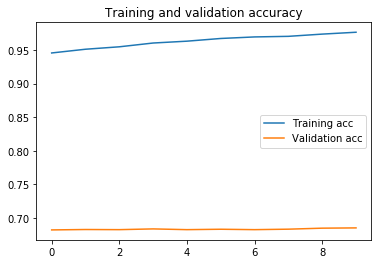

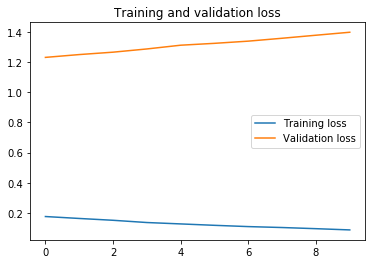

start 51
Train on 40000 samples, validate on 10000 samples
Epoch 1/10
40000/40000 [==============================] - 45s 1ms/sample - loss: 0.0830 - acc: 0.9782 - val_loss: 1.4206 - val_acc: 0.6857
Epoch 2/10
40000/40000 [==============================] - 45s 1ms/sample - loss: 0.0788 - acc: 0.9797 - val_loss: 1.4338 - val_acc: 0.6852
Epoch 3/10
40000/40000 [==============================] - 45s 1ms/sample - loss: 0.0746 - acc: 0.9806 - val_loss: 1.4503 - val_acc: 0.6869
Epoch 4/10
40000/40000 [==============================] - 45s 1ms/sample - loss: 0.0724 - acc: 0.9815 - val_loss: 1.4680 - val_acc: 0.6857
Epoch 5/10
40000/40000 [==============================] - 45s 1ms/sample - loss: 0.0676 - acc: 0.9819 - val_loss: 1.4909 - val_acc: 0.6876
Epoch 6/10
40000/40000 [==============================] - 44s 1ms/sample - loss: 0.0623 - acc: 0.9835 - val_loss: 1.5078 - val_acc: 0.6878
Epoch 7/10
40000/40000 [==============================] - 45s 1ms/sample - loss: 0.0566 - acc: 0.9859 - val

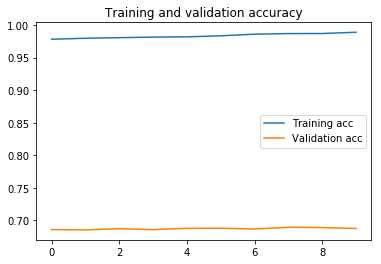

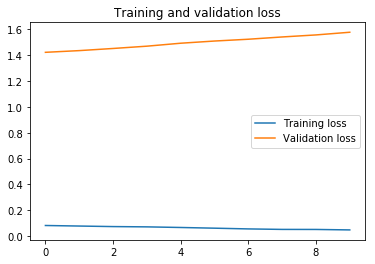

In [0]:
# 訓練模型  加碼
train_cycle = 5
epoch_num = 10

for i in range(train_cycle):
  print(f'start {11+i*10}')
  fname = 'model-resnet50-final'+str(11+i*10)+'.h5'
  WEIGHTS_FINAL = root+'ColabOK/'+fname
  history= net_final.fit(x_train,y_train, epochs=NUM_EPOCHS, batch_size=512, validation_split=0.2, verbose=1)
  net_final.save(WEIGHTS_FINAL)
  call_history(history)
  

### We found around epoch #26, #27, the loss was getting lower, even accuracy was increasing.
### to select _21.h5 or _31.h5 is a good guess, check them later

In [0]:

i=2
fname = 'model-resnet50-final'+str(1+i*10)+'.h5'
WEIGHTS_FINAL = root+'ColabOK/'+fname

net_final.load_weights(WEIGHTS_FINAL)
net_final.evaluate(x_test,y_test)
# 21: [1.0819940867424012, 0.6686]
# 31: [1.2207230070114137, 0.6762]
# 51: [1.5665882215499878, 0.6862]
# In face, we could find these data from history, if we have append them into a list

10000/10000 [==============================] - 11s 1ms/sample - loss: 1.0820 - acc: 0.6686


[1.0819940867424012, 0.6686]

/usr/local/lib/python3.6/dist-packages/keras_applications/resnet50.py:265: UserWarning: The output shape of `ResNet50(include_top=False)` has been changed since Keras 2.2.0.
  warnings.warn('The output shape of `ResNet50(include_top=False)` '


start 1
Epoch 1/10
97/97 [==============================] - 102s 1s/step - loss: 2.8544 - acc: 0.1033 - val_loss: 2.5934 - val_acc: 0.0972
Epoch 2/10
97/97 [==============================] - 56s 575ms/step - loss: 2.5863 - acc: 0.1089 - val_loss: 2.6012 - val_acc: 0.1060
Epoch 3/10
97/97 [==============================] - 56s 576ms/step - loss: 2.4672 - acc: 0.1186 - val_loss: 2.4974 - val_acc: 0.1063
Epoch 4/10
97/97 [==============================] - 56s 576ms/step - loss: 2.4063 - acc: 0.1236 - val_loss: 2.4386 - val_acc: 0.1081
Epoch 5/10
97/97 [==============================] - 56s 576ms/step - loss: 2.3625 - acc: 0.1268 - val_loss: 2.4126 - val_acc: 0.1106
Epoch 6/10
97/97 [==============================] - 56s 575ms/step - loss: 2.3413 - acc: 0.1289 - val_loss: 2.4120 - val_acc: 0.1113
Epoch 7/10
97/97 [==============================] - 56s 574ms/step - loss: 2.3239 - acc: 0.1310 - val_loss: 2.4079 - val_acc: 0.1169
Epoch 8/10
97/97 [==============================] - 56s 577ms/s

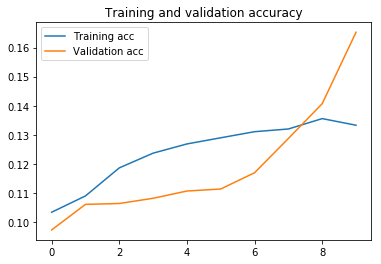

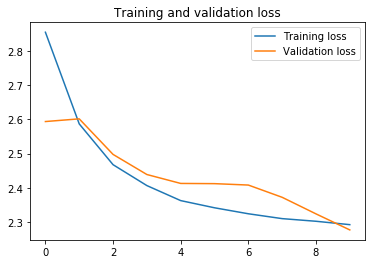

start 11
Epoch 1/10
97/97 [==============================] - 57s 586ms/step - loss: 2.2839 - acc: 0.1355 - val_loss: 2.2357 - val_acc: 0.1825
Epoch 2/10
97/97 [==============================] - 56s 574ms/step - loss: 2.2828 - acc: 0.1364 - val_loss: 2.1887 - val_acc: 0.2058
Epoch 3/10
97/97 [==============================] - 56s 575ms/step - loss: 2.2788 - acc: 0.1392 - val_loss: 2.1529 - val_acc: 0.2283
Epoch 4/10
97/97 [==============================] - 56s 577ms/step - loss: 2.2752 - acc: 0.1380 - val_loss: 2.1331 - val_acc: 0.2394
Epoch 5/10
97/97 [==============================] - 56s 574ms/step - loss: 2.2717 - acc: 0.1354 - val_loss: 2.0866 - val_acc: 0.2524
Epoch 6/10
97/97 [==============================] - 56s 574ms/step - loss: 2.2719 - acc: 0.1376 - val_loss: 2.0961 - val_acc: 0.2587
Epoch 7/10
97/97 [==============================] - 56s 575ms/step - loss: 2.2678 - acc: 0.1397 - val_loss: 2.0502 - val_acc: 0.2611
Epoch 8/10
97/97 [==============================] - 56s 574m

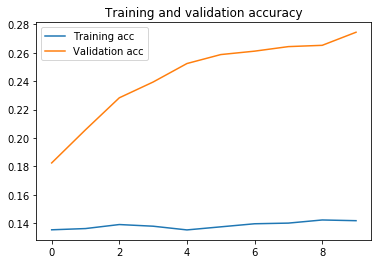

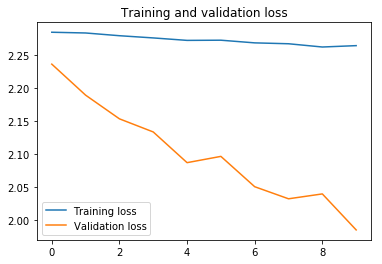

start 21
Epoch 1/10
97/97 [==============================] - 56s 580ms/step - loss: 2.2628 - acc: 0.1408 - val_loss: 1.9698 - val_acc: 0.2800
Epoch 2/10
97/97 [==============================] - 56s 576ms/step - loss: 2.2583 - acc: 0.1419 - val_loss: 1.9610 - val_acc: 0.2866
Epoch 3/10
97/97 [==============================] - 56s 575ms/step - loss: 2.2594 - acc: 0.1427 - val_loss: 1.9841 - val_acc: 0.2863
Epoch 4/10
97/97 [==============================] - 56s 574ms/step - loss: 2.2611 - acc: 0.1431 - val_loss: 1.9487 - val_acc: 0.2861
Epoch 5/10
97/97 [==============================] - 55s 572ms/step - loss: 2.2599 - acc: 0.1409 - val_loss: 1.9239 - val_acc: 0.2912
Epoch 6/10
97/97 [==============================] - 55s 572ms/step - loss: 2.2585 - acc: 0.1420 - val_loss: 1.9091 - val_acc: 0.2977
Epoch 7/10
97/97 [==============================] - 55s 570ms/step - loss: 2.2563 - acc: 0.1421 - val_loss: 1.9174 - val_acc: 0.2994
Epoch 8/10
97/97 [==============================] - 56s 573m

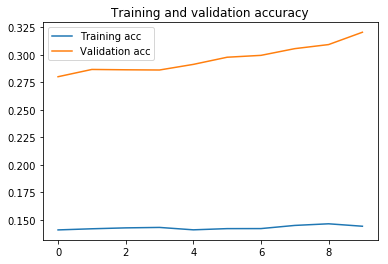

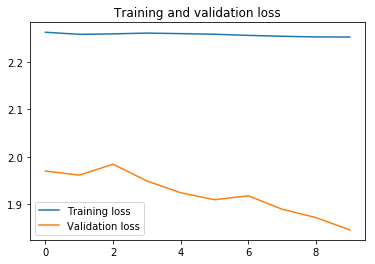

start 31
Epoch 1/10
97/97 [==============================] - 57s 583ms/step - loss: 2.2506 - acc: 0.1465 - val_loss: 1.8474 - val_acc: 0.3205
Epoch 2/10
97/97 [==============================] - 56s 577ms/step - loss: 2.2504 - acc: 0.1450 - val_loss: 1.8317 - val_acc: 0.3218
Epoch 3/10
97/97 [==============================] - 56s 574ms/step - loss: 2.2502 - acc: 0.1459 - val_loss: 1.8167 - val_acc: 0.3330
Epoch 4/10
97/97 [==============================] - 56s 576ms/step - loss: 2.2512 - acc: 0.1454 - val_loss: 1.8001 - val_acc: 0.3404
Epoch 5/10
97/97 [==============================] - 56s 577ms/step - loss: 2.2493 - acc: 0.1479 - val_loss: 1.7980 - val_acc: 0.3417
Epoch 6/10
97/97 [==============================] - 56s 575ms/step - loss: 2.2494 - acc: 0.1439 - val_loss: 1.7790 - val_acc: 0.3498
Epoch 7/10
97/97 [==============================] - 56s 575ms/step - loss: 2.2470 - acc: 0.1451 - val_loss: 1.7794 - val_acc: 0.3478
Epoch 8/10
97/97 [==============================] - 56s 575m

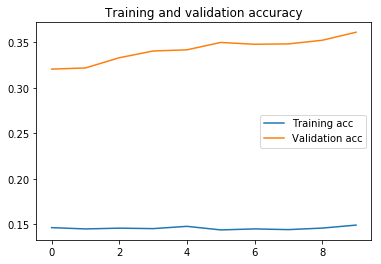

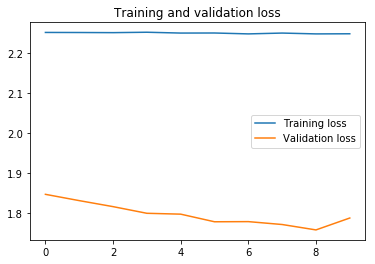

start 41
Epoch 1/10
97/97 [==============================] - 56s 582ms/step - loss: 2.2458 - acc: 0.1471 - val_loss: 1.7508 - val_acc: 0.3575
Epoch 2/10
97/97 [==============================] - 56s 575ms/step - loss: 2.2423 - acc: 0.1502 - val_loss: 1.7240 - val_acc: 0.3639
Epoch 3/10
97/97 [==============================] - 56s 576ms/step - loss: 2.2457 - acc: 0.1503 - val_loss: 1.7111 - val_acc: 0.3680
Epoch 4/10
97/97 [==============================] - 56s 575ms/step - loss: 2.2446 - acc: 0.1488 - val_loss: 1.7053 - val_acc: 0.3750
Epoch 5/10
97/97 [==============================] - 56s 574ms/step - loss: 2.2438 - acc: 0.1494 - val_loss: 1.6773 - val_acc: 0.3910
Epoch 6/10
97/97 [==============================] - 56s 576ms/step - loss: 2.2392 - acc: 0.1506 - val_loss: 1.6737 - val_acc: 0.3904
Epoch 7/10
97/97 [==============================] - 56s 573ms/step - loss: 2.2416 - acc: 0.1507 - val_loss: 1.6623 - val_acc: 0.3958
Epoch 8/10
97/97 [==============================] - 55s 572m

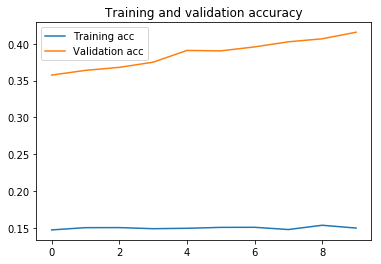

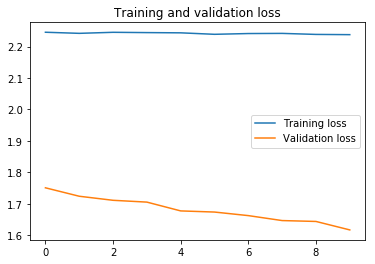

In [0]:
net = ResNet50(include_top=False, weights='imagenet', input_tensor=None,
               input_shape=(IMAGE_SIZE[0],IMAGE_SIZE[1],3))
x = net.output
x = Flatten()(x)
x = Dense(256,activation='relu')(x)

# 增加 DropOut layer
x = Dropout(0.5)(x)

# 增加 Dense layer，以 softmax 產生個類別的機率值
output_layer = Dense(NUM_CLASSES, activation='softmax', name='softmax')(x)

# 設定凍結與要進行訓練的網路層
net_final = Model(inputs=net.input, outputs=output_layer)
for layer in net_final.layers[:FREEZE_LAYERS]:
    layer.trainable = False
for layer in net_final.layers[FREEZE_LAYERS:]:
    layer.trainable = True

# 使用 Adam optimizer，以較低的 learning rate 進行 fine-tuning
net_final.compile(optimizer=Adam(lr=1e-5),
                  loss='categorical_crossentropy', metrics=['accuracy'])

# 輸出整個網路結構
#print(net_final.summary())



train_datagen = ImageDataGenerator(rotation_range=40,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   channel_shift_range=10,
                                   horizontal_flip=True,
                                   fill_mode='nearest')


train_datagen.fit(x_train)

 
  
train_cycle = 5
epoch_num = 10

for i in range(train_cycle):
  print(f'start {1+i*10}')
  fname = 'model-resnet50-final-AR'+str(1+i*10)+'.h5'
  WEIGHTS_FINAL = root+'ColabOK/'+fname
  history_AR= net_final.fit_generator(train_datagen.flow(x_train, y_train, batch_size=512),
                    steps_per_epoch=int(len(x_train)//512),
                    validation_data=(x_test, y_test),
                    epochs=epoch_num, verbose=1)
  net_final.save(WEIGHTS_FINAL)
  call_history(history_AR)
  


start 51
Epoch 1/10
97/97 [==============================] - 57s 584ms/step - loss: 2.2395 - acc: 0.1525 - val_loss: 1.6067 - val_acc: 0.4182
Epoch 2/10
97/97 [==============================] - 56s 577ms/step - loss: 2.2381 - acc: 0.1527 - val_loss: 1.5986 - val_acc: 0.4208
Epoch 3/10
97/97 [==============================] - 56s 577ms/step - loss: 2.2382 - acc: 0.1495 - val_loss: 1.5897 - val_acc: 0.4282
Epoch 4/10
97/97 [==============================] - 56s 575ms/step - loss: 2.2372 - acc: 0.1526 - val_loss: 1.5863 - val_acc: 0.4340
Epoch 5/10
97/97 [==============================] - 56s 575ms/step - loss: 2.2364 - acc: 0.1539 - val_loss: 1.5862 - val_acc: 0.4249
Epoch 6/10
97/97 [==============================] - 56s 577ms/step - loss: 2.2368 - acc: 0.1535 - val_loss: 1.5662 - val_acc: 0.4355
Epoch 7/10
97/97 [==============================] - 56s 574ms/step - loss: 2.2375 - acc: 0.1507 - val_loss: 1.5573 - val_acc: 0.4381
Epoch 8/10
97/97 [==============================] - 56s 575m

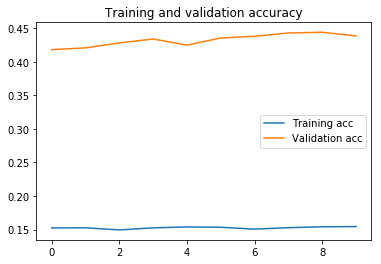

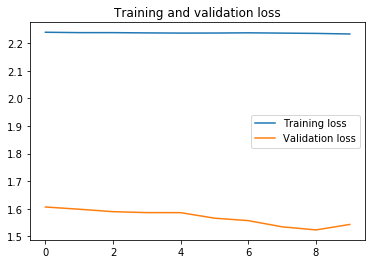

start 61
Epoch 1/10
97/97 [==============================] - 56s 582ms/step - loss: 2.2321 - acc: 0.1551 - val_loss: 1.4822 - val_acc: 0.4616
Epoch 2/10
97/97 [==============================] - 56s 576ms/step - loss: 2.2302 - acc: 0.1534 - val_loss: 1.4776 - val_acc: 0.4668
Epoch 3/10
97/97 [==============================] - 56s 575ms/step - loss: 2.2311 - acc: 0.1569 - val_loss: 1.4790 - val_acc: 0.4674
Epoch 4/10
97/97 [==============================] - 56s 577ms/step - loss: 2.2322 - acc: 0.1544 - val_loss: 1.4896 - val_acc: 0.4564
Epoch 5/10
97/97 [==============================] - 56s 577ms/step - loss: 2.2279 - acc: 0.1560 - val_loss: 1.4595 - val_acc: 0.4684
Epoch 6/10
97/97 [==============================] - 56s 573ms/step - loss: 2.2316 - acc: 0.1570 - val_loss: 1.4895 - val_acc: 0.4660
Epoch 7/10
97/97 [==============================] - 56s 576ms/step - loss: 2.2301 - acc: 0.1549 - val_loss: 1.4266 - val_acc: 0.4869
Epoch 8/10
97/97 [==============================] - 56s 577m

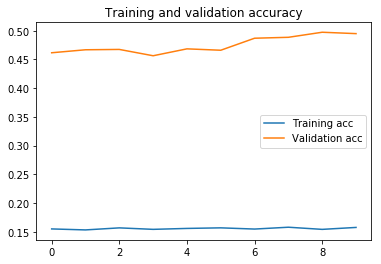

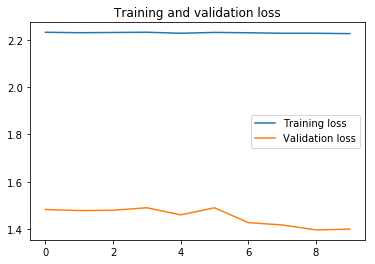

start 71
Epoch 1/10
97/97 [==============================] - 56s 582ms/step - loss: 2.2248 - acc: 0.1593 - val_loss: 1.3667 - val_acc: 0.5126
Epoch 2/10
97/97 [==============================] - 55s 572ms/step - loss: 2.2267 - acc: 0.1582 - val_loss: 1.3629 - val_acc: 0.5138
Epoch 3/10
97/97 [==============================] - 56s 576ms/step - loss: 2.2210 - acc: 0.1581 - val_loss: 1.3510 - val_acc: 0.5144
Epoch 4/10
97/97 [==============================] - 56s 578ms/step - loss: 2.2230 - acc: 0.1591 - val_loss: 1.3476 - val_acc: 0.5147
Epoch 5/10
97/97 [==============================] - 56s 575ms/step - loss: 2.2219 - acc: 0.1593 - val_loss: 1.3302 - val_acc: 0.5235
Epoch 6/10
97/97 [==============================] - 56s 575ms/step - loss: 2.2207 - acc: 0.1582 - val_loss: 1.3401 - val_acc: 0.5237
Epoch 7/10
97/97 [==============================] - 56s 577ms/step - loss: 2.2232 - acc: 0.1577 - val_loss: 1.3302 - val_acc: 0.5259
Epoch 8/10
97/97 [==============================] - 56s 575m

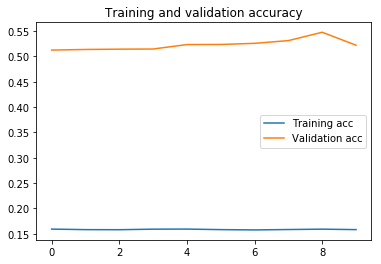

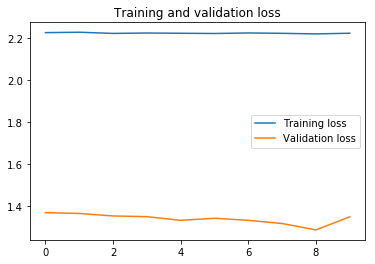

start 81
Epoch 1/10
97/97 [==============================] - 56s 580ms/step - loss: 2.2190 - acc: 0.1616 - val_loss: 1.2997 - val_acc: 0.5424
Epoch 2/10
97/97 [==============================] - 56s 577ms/step - loss: 2.2186 - acc: 0.1604 - val_loss: 1.2809 - val_acc: 0.5451
Epoch 3/10
97/97 [==============================] - 56s 577ms/step - loss: 2.2208 - acc: 0.1597 - val_loss: 1.2916 - val_acc: 0.5401
Epoch 4/10
97/97 [==============================] - 56s 574ms/step - loss: 2.2214 - acc: 0.1571 - val_loss: 1.2998 - val_acc: 0.5374
Epoch 5/10
97/97 [==============================] - 56s 576ms/step - loss: 2.2140 - acc: 0.1612 - val_loss: 1.2656 - val_acc: 0.5477
Epoch 6/10
97/97 [==============================] - 56s 576ms/step - loss: 2.2176 - acc: 0.1609 - val_loss: 1.2916 - val_acc: 0.5438
Epoch 7/10
97/97 [==============================] - 56s 574ms/step - loss: 2.2186 - acc: 0.1599 - val_loss: 1.2850 - val_acc: 0.5452
Epoch 8/10
97/97 [==============================] - 56s 578m

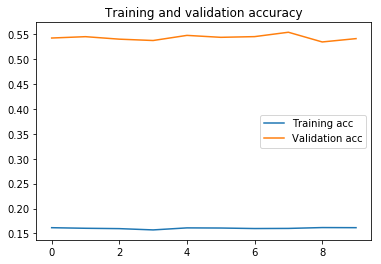

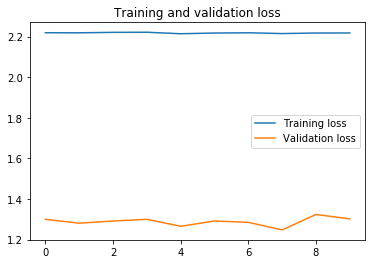

start 91
Epoch 1/10
97/97 [==============================] - 57s 584ms/step - loss: 2.2130 - acc: 0.1625 - val_loss: 1.2429 - val_acc: 0.5556
Epoch 2/10
97/97 [==============================] - 56s 576ms/step - loss: 2.2139 - acc: 0.1605 - val_loss: 1.2515 - val_acc: 0.5533
Epoch 3/10
97/97 [==============================] - 56s 572ms/step - loss: 2.2148 - acc: 0.1624 - val_loss: 1.2404 - val_acc: 0.5555
Epoch 4/10
97/97 [==============================] - 56s 578ms/step - loss: 2.2128 - acc: 0.1650 - val_loss: 1.2290 - val_acc: 0.5627
Epoch 5/10
97/97 [==============================] - 56s 577ms/step - loss: 2.2136 - acc: 0.1631 - val_loss: 1.2096 - val_acc: 0.5708
Epoch 6/10
97/97 [==============================] - 56s 574ms/step - loss: 2.2142 - acc: 0.1612 - val_loss: 1.2220 - val_acc: 0.5689
Epoch 7/10
97/97 [==============================] - 56s 578ms/step - loss: 2.2120 - acc: 0.1633 - val_loss: 1.2024 - val_acc: 0.5773
Epoch 8/10
97/97 [==============================] - 56s 576m

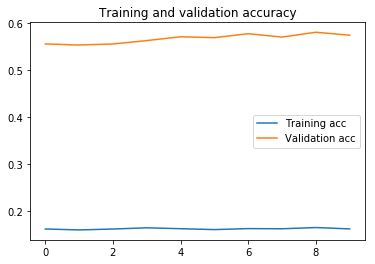

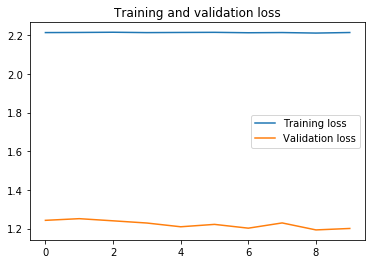

In [0]:
train_cycle = 5
epoch_num = 10

for i in range(train_cycle):
  print(f'start {51+i*10}')
  fname = 'model-resnet50-final-AR'+str(51+i*10)+'.h5'
  WEIGHTS_FINAL = root+'ColabOK/'+fname
  history_AR= net_final.fit_generator(train_datagen.flow(x_train, y_train, batch_size=512),
                    steps_per_epoch=int(len(x_train)//512),
                    validation_data=(x_test, y_test),
                    epochs=epoch_num, verbose=1)
  net_final.save(WEIGHTS_FINAL)
  call_history(history_AR)

start 101
Epoch 1/10
97/97 [==============================] - 57s 586ms/step - loss: 2.2124 - acc: 0.1644 - val_loss: 1.1789 - val_acc: 0.5809
Epoch 2/10
97/97 [==============================] - 56s 576ms/step - loss: 2.2105 - acc: 0.1634 - val_loss: 1.1783 - val_acc: 0.5860
Epoch 3/10
97/97 [==============================] - 56s 576ms/step - loss: 2.2114 - acc: 0.1631 - val_loss: 1.2116 - val_acc: 0.5761
Epoch 4/10
97/97 [==============================] - 56s 577ms/step - loss: 2.2093 - acc: 0.1653 - val_loss: 1.1826 - val_acc: 0.5849
Epoch 5/10
97/97 [==============================] - 56s 577ms/step - loss: 2.2103 - acc: 0.1642 - val_loss: 1.1763 - val_acc: 0.5873
Epoch 6/10
97/97 [==============================] - 56s 575ms/step - loss: 2.2125 - acc: 0.1650 - val_loss: 1.1856 - val_acc: 0.5810
Epoch 7/10
97/97 [==============================] - 56s 576ms/step - loss: 2.2133 - acc: 0.1619 - val_loss: 1.1659 - val_acc: 0.5877
Epoch 8/10
97/97 [==============================] - 56s 576

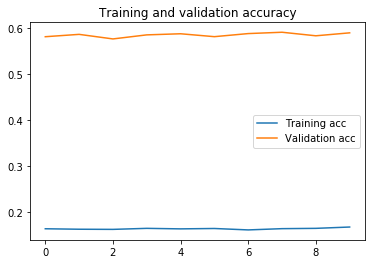

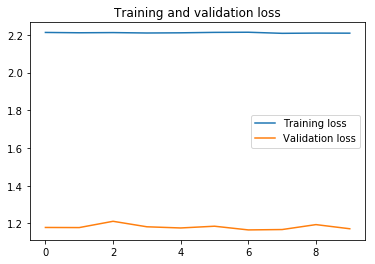

start 111
Epoch 1/10
97/97 [==============================] - 57s 583ms/step - loss: 2.2072 - acc: 0.1638 - val_loss: 1.1905 - val_acc: 0.5867
Epoch 2/10
97/97 [==============================] - 56s 576ms/step - loss: 2.2087 - acc: 0.1653 - val_loss: 1.1146 - val_acc: 0.6085
Epoch 3/10
97/97 [==============================] - 56s 577ms/step - loss: 2.2090 - acc: 0.1648 - val_loss: 1.1343 - val_acc: 0.6018
Epoch 4/10
97/97 [==============================] - 56s 575ms/step - loss: 2.2094 - acc: 0.1674 - val_loss: 1.1388 - val_acc: 0.5974
Epoch 5/10
97/97 [==============================] - 56s 577ms/step - loss: 2.2087 - acc: 0.1664 - val_loss: 1.1244 - val_acc: 0.6051
Epoch 6/10
97/97 [==============================] - 56s 577ms/step - loss: 2.2066 - acc: 0.1680 - val_loss: 1.1254 - val_acc: 0.6062
Epoch 7/10
97/97 [==============================] - 56s 576ms/step - loss: 2.2060 - acc: 0.1666 - val_loss: 1.1400 - val_acc: 0.5982
Epoch 8/10
97/97 [==============================] - 56s 578

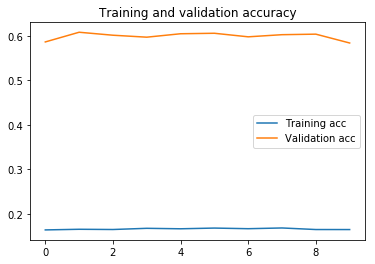

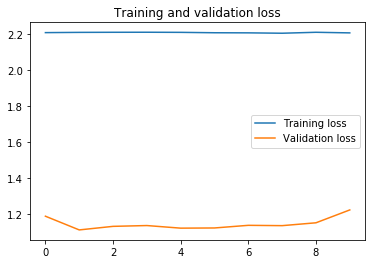

start 121
Epoch 1/10
97/97 [==============================] - 57s 586ms/step - loss: 2.2060 - acc: 0.1663 - val_loss: 1.1051 - val_acc: 0.6135
Epoch 2/10
97/97 [==============================] - 56s 577ms/step - loss: 2.2046 - acc: 0.1680 - val_loss: 1.1561 - val_acc: 0.6096
Epoch 3/10
97/97 [==============================] - 56s 576ms/step - loss: 2.2058 - acc: 0.1647 - val_loss: 1.1265 - val_acc: 0.6032
Epoch 4/10
97/97 [==============================] - 56s 575ms/step - loss: 2.2049 - acc: 0.1682 - val_loss: 1.0901 - val_acc: 0.6194
Epoch 5/10
97/97 [==============================] - 56s 578ms/step - loss: 2.2036 - acc: 0.1686 - val_loss: 1.1154 - val_acc: 0.6133
Epoch 6/10
97/97 [==============================] - 56s 573ms/step - loss: 2.2044 - acc: 0.1654 - val_loss: 1.0874 - val_acc: 0.6271
Epoch 7/10
97/97 [==============================] - 56s 577ms/step - loss: 2.2020 - acc: 0.1651 - val_loss: 1.1392 - val_acc: 0.6026
Epoch 8/10
97/97 [==============================] - 56s 579

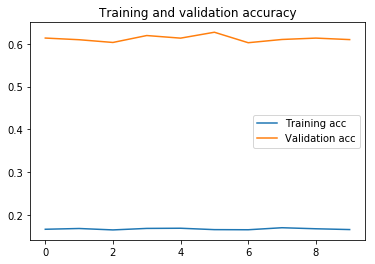

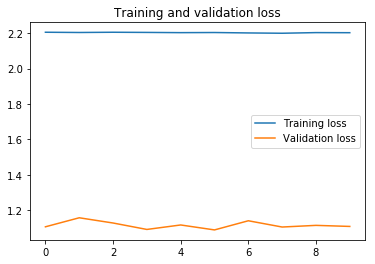

start 131
Epoch 1/10
97/97 [==============================] - 56s 581ms/step - loss: 2.2065 - acc: 0.1683 - val_loss: 1.1049 - val_acc: 0.6147
Epoch 2/10
97/97 [==============================] - 56s 575ms/step - loss: 2.2002 - acc: 0.1673 - val_loss: 1.0927 - val_acc: 0.6248
Epoch 3/10
97/97 [==============================] - 56s 578ms/step - loss: 2.2010 - acc: 0.1701 - val_loss: 1.0855 - val_acc: 0.6246
Epoch 4/10
97/97 [==============================] - 56s 575ms/step - loss: 2.2020 - acc: 0.1677 - val_loss: 1.0514 - val_acc: 0.6376
Epoch 5/10
97/97 [==============================] - 56s 576ms/step - loss: 2.2010 - acc: 0.1685 - val_loss: 1.0705 - val_acc: 0.6323
Epoch 6/10
97/97 [==============================] - 56s 577ms/step - loss: 2.2006 - acc: 0.1696 - val_loss: 1.0861 - val_acc: 0.6260
Epoch 7/10
97/97 [==============================] - 56s 576ms/step - loss: 2.1985 - acc: 0.1705 - val_loss: 1.0568 - val_acc: 0.6359
Epoch 8/10
97/97 [==============================] - 56s 574

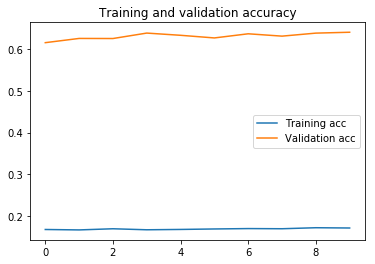

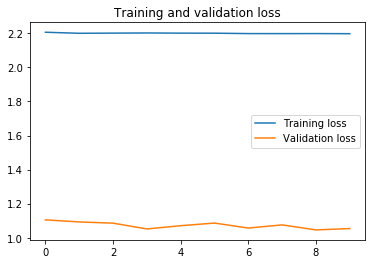

start 141
Epoch 1/10
97/97 [==============================] - 57s 583ms/step - loss: 2.1965 - acc: 0.1724 - val_loss: 1.0721 - val_acc: 0.6268
Epoch 2/10
97/97 [==============================] - 56s 575ms/step - loss: 2.1999 - acc: 0.1693 - val_loss: 1.0874 - val_acc: 0.6250
Epoch 3/10
97/97 [==============================] - 56s 577ms/step - loss: 2.1984 - acc: 0.1688 - val_loss: 1.0437 - val_acc: 0.6409
Epoch 4/10
97/97 [==============================] - 56s 575ms/step - loss: 2.1999 - acc: 0.1686 - val_loss: 1.0622 - val_acc: 0.6359
Epoch 5/10
97/97 [==============================] - 56s 575ms/step - loss: 2.1977 - acc: 0.1687 - val_loss: 1.0660 - val_acc: 0.6349
Epoch 6/10
97/97 [==============================] - 56s 576ms/step - loss: 2.2014 - acc: 0.1670 - val_loss: 1.0124 - val_acc: 0.6511
Epoch 7/10
97/97 [==============================] - 56s 574ms/step - loss: 2.1958 - acc: 0.1694 - val_loss: 1.0363 - val_acc: 0.6437
Epoch 8/10
97/97 [==============================] - 56s 576

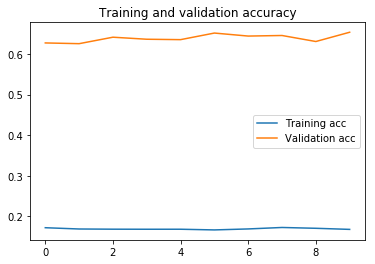

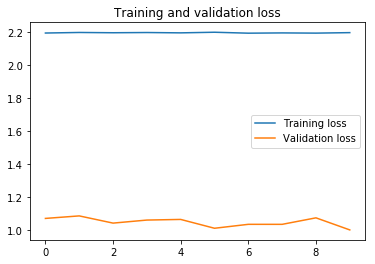

start 151
Epoch 1/10
97/97 [==============================] - 57s 584ms/step - loss: 2.1967 - acc: 0.1701 - val_loss: 1.0574 - val_acc: 0.6379
Epoch 2/10
97/97 [==============================] - 56s 575ms/step - loss: 2.1995 - acc: 0.1694 - val_loss: 1.0600 - val_acc: 0.6354
Epoch 3/10
97/97 [==============================] - 56s 576ms/step - loss: 2.1956 - acc: 0.1683 - val_loss: 1.0248 - val_acc: 0.6448
Epoch 4/10
97/97 [==============================] - 56s 577ms/step - loss: 2.1965 - acc: 0.1698 - val_loss: 1.0345 - val_acc: 0.6436
Epoch 5/10
97/97 [==============================] - 56s 573ms/step - loss: 2.1977 - acc: 0.1698 - val_loss: 1.0271 - val_acc: 0.6456
Epoch 6/10
97/97 [==============================] - 56s 574ms/step - loss: 2.1978 - acc: 0.1679 - val_loss: 1.0544 - val_acc: 0.6374
Epoch 7/10
97/97 [==============================] - 56s 577ms/step - loss: 2.1949 - acc: 0.1713 - val_loss: 0.9980 - val_acc: 0.6564
Epoch 8/10
97/97 [==============================] - 56s 574

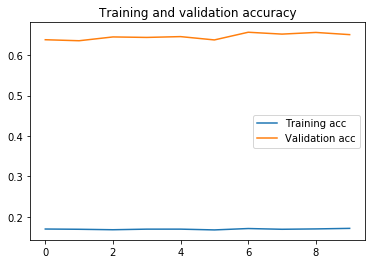

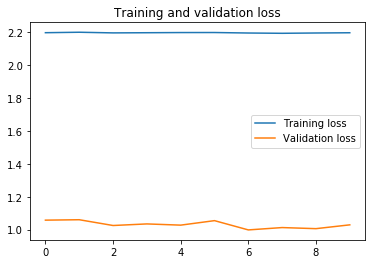

start 161
Epoch 1/10
97/97 [==============================] - 56s 582ms/step - loss: 2.1950 - acc: 0.1721 - val_loss: 1.0277 - val_acc: 0.6477
Epoch 2/10
97/97 [==============================] - 56s 573ms/step - loss: 2.1942 - acc: 0.1727 - val_loss: 1.0182 - val_acc: 0.6512
Epoch 3/10
97/97 [==============================] - 56s 576ms/step - loss: 2.1906 - acc: 0.1737 - val_loss: 1.0165 - val_acc: 0.6513
Epoch 4/10
97/97 [==============================] - 56s 576ms/step - loss: 2.1941 - acc: 0.1703 - val_loss: 0.9855 - val_acc: 0.6604
Epoch 5/10
97/97 [==============================] - 56s 576ms/step - loss: 2.1963 - acc: 0.1690 - val_loss: 0.9773 - val_acc: 0.6641
Epoch 6/10
97/97 [==============================] - 56s 575ms/step - loss: 2.1918 - acc: 0.1733 - val_loss: 1.0021 - val_acc: 0.6522
Epoch 7/10
97/97 [==============================] - 56s 577ms/step - loss: 2.1949 - acc: 0.1690 - val_loss: 0.9871 - val_acc: 0.6568
Epoch 8/10
97/97 [==============================] - 56s 574

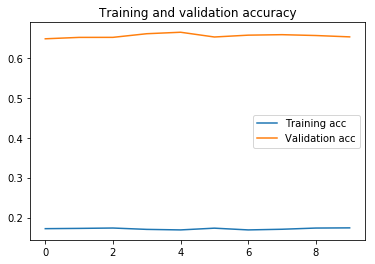

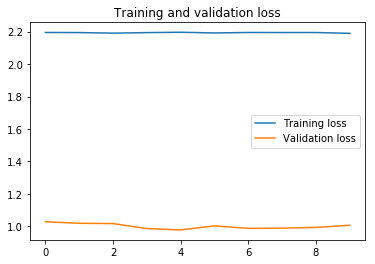

start 171
Epoch 1/10
97/97 [==============================] - 56s 578ms/step - loss: 2.1967 - acc: 0.1696 - val_loss: 1.0008 - val_acc: 0.6581
Epoch 2/10
97/97 [==============================] - 55s 569ms/step - loss: 2.1939 - acc: 0.1734 - val_loss: 1.0232 - val_acc: 0.6516
Epoch 3/10
97/97 [==============================] - 55s 568ms/step - loss: 2.1928 - acc: 0.1717 - val_loss: 1.0184 - val_acc: 0.6524
Epoch 4/10
97/97 [==============================] - 55s 566ms/step - loss: 2.1932 - acc: 0.1698 - val_loss: 0.9548 - val_acc: 0.6693
Epoch 5/10
97/97 [==============================] - 55s 567ms/step - loss: 2.1949 - acc: 0.1703 - val_loss: 0.9763 - val_acc: 0.6621
Epoch 6/10
97/97 [==============================] - 56s 574ms/step - loss: 2.1943 - acc: 0.1706 - val_loss: 0.9853 - val_acc: 0.6615
Epoch 7/10
97/97 [==============================] - 56s 580ms/step - loss: 2.1916 - acc: 0.1756 - val_loss: 0.9867 - val_acc: 0.6650
Epoch 8/10
97/97 [==============================] - 55s 570

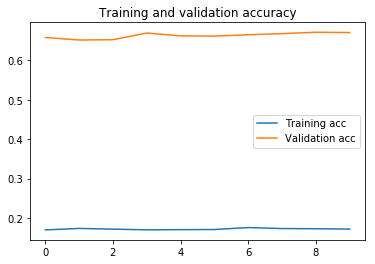

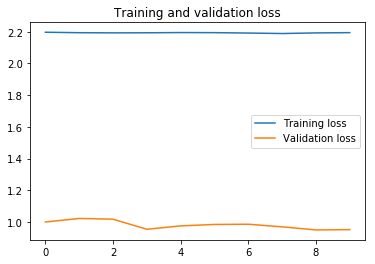

start 181
Epoch 1/10
97/97 [==============================] - 57s 586ms/step - loss: 2.1951 - acc: 0.1717 - val_loss: 1.0283 - val_acc: 0.6459
Epoch 2/10
97/97 [==============================] - 56s 576ms/step - loss: 2.1911 - acc: 0.1723 - val_loss: 0.9745 - val_acc: 0.6638
Epoch 3/10
97/97 [==============================] - 56s 574ms/step - loss: 2.1880 - acc: 0.1733 - val_loss: 0.9509 - val_acc: 0.6726
Epoch 4/10
97/97 [==============================] - 55s 568ms/step - loss: 2.1915 - acc: 0.1725 - val_loss: 0.9721 - val_acc: 0.6677
Epoch 5/10
97/97 [==============================] - 56s 573ms/step - loss: 2.1916 - acc: 0.1713 - val_loss: 0.9421 - val_acc: 0.6784
Epoch 6/10
97/97 [==============================] - 55s 571ms/step - loss: 2.1915 - acc: 0.1715 - val_loss: 0.9910 - val_acc: 0.6650
Epoch 7/10
97/97 [==============================] - 56s 576ms/step - loss: 2.1904 - acc: 0.1705 - val_loss: 0.9482 - val_acc: 0.6720
Epoch 8/10
97/97 [==============================] - 56s 573

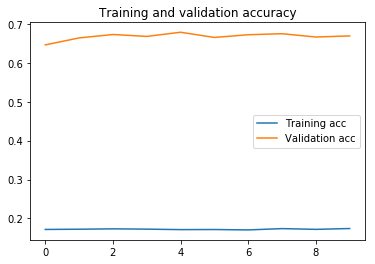

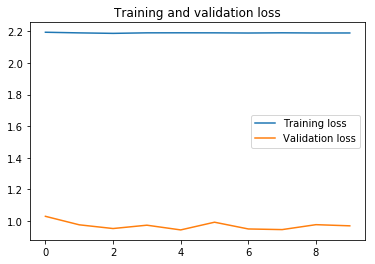

start 191
Epoch 1/10
97/97 [==============================] - 56s 582ms/step - loss: 2.1927 - acc: 0.1738 - val_loss: 0.9287 - val_acc: 0.6767
Epoch 2/10
97/97 [==============================] - 56s 576ms/step - loss: 2.1910 - acc: 0.1737 - val_loss: 0.9784 - val_acc: 0.6657
Epoch 3/10
97/97 [==============================] - 56s 574ms/step - loss: 2.1904 - acc: 0.1741 - val_loss: 0.9536 - val_acc: 0.6725
Epoch 4/10
97/97 [==============================] - 56s 578ms/step - loss: 2.1906 - acc: 0.1740 - val_loss: 0.9298 - val_acc: 0.6798
Epoch 5/10
97/97 [==============================] - 56s 574ms/step - loss: 2.1884 - acc: 0.1704 - val_loss: 0.9684 - val_acc: 0.6722
Epoch 6/10
97/97 [==============================] - 55s 570ms/step - loss: 2.1901 - acc: 0.1758 - val_loss: 0.9687 - val_acc: 0.6744
Epoch 7/10
97/97 [==============================] - 55s 568ms/step - loss: 2.1845 - acc: 0.1775 - val_loss: 0.9525 - val_acc: 0.6786
Epoch 8/10
97/97 [==============================] - 55s 570

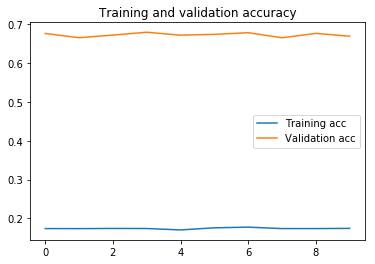

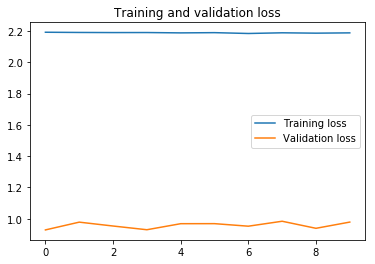

In [0]:
train_cycle = 10
epoch_num = 10

for i in range(train_cycle):
  print(f'start {101+i*10}')
  fname = 'model-resnet50-final-AR'+str(101+i*10)+'.h5'
  WEIGHTS_FINAL = root+'ColabOK/'+fname
  history_AR= net_final.fit_generator(train_datagen.flow(x_train, y_train, batch_size=512),
                    steps_per_epoch=int(len(x_train)//512),
                    validation_data=(x_test, y_test),
                    epochs=epoch_num, verbose=1)
  net_final.save(WEIGHTS_FINAL)
  call_history(history_AR)

# It seemed we went Augmentation too far, let's be gentler and move out dropout.

In [16]:
net = ResNet50(include_top=False, weights='imagenet', input_tensor=None,
               input_shape=(IMAGE_SIZE[0],IMAGE_SIZE[1],3))
x = net.output
x = Flatten()(x)
x = Dense(256,activation='relu')(x)

# 增加 DropOut layer
#x = Dropout(0.5)(x)

# 增加 Dense layer，以 softmax 產生個類別的機率值
output_layer = Dense(NUM_CLASSES, activation='softmax', name='softmax')(x)

# 設定凍結與要進行訓練的網路層
net_final = Model(inputs=net.input, outputs=output_layer)
for layer in net_final.layers[:FREEZE_LAYERS]:
    layer.trainable = False
for layer in net_final.layers[FREEZE_LAYERS:]:
    layer.trainable = True

# 使用 Adam optimizer，以較低的 learning rate 進行 fine-tuning
net_final.compile(optimizer=Adam(lr=1e-5),
                  loss='categorical_crossentropy', metrics=['accuracy'])

# 輸出整個網路結構
#print(net_final.summary())



train_datagen1 = ImageDataGenerator(rotation_range=10,
                                   width_shift_range=0.1,
                                   height_shift_range=0.1,
                                   shear_range=0.1,
                                   zoom_range=0.1,
                                   channel_shift_range=5,
                                   horizontal_flip=True,
                                   fill_mode='nearest')

train_datagen2 = ImageDataGenerator(rotation_range=20,
                                   width_shift_range=0.15,
                                   height_shift_range=0.15,
                                   shear_range=0.15,
                                   zoom_range=0.15,
                                   channel_shift_range=5,
                                   horizontal_flip=True,
                                   fill_mode='nearest')
train_datagen3 = ImageDataGenerator(rotation_range=40,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   channel_shift_range=10,
                                   horizontal_flip=True,
                                   fill_mode='nearest')


train_datagen1.fit(x_train)
train_datagen2.fit(x_train)
train_datagen3.fit(x_train)



 
  
train_cycle = 20
epoch_num = 10
#h5 = root+'ColabOK/'+'model-resnet50-final-AR2131.h5'

#net_final.load_weights(h5)

for i in range(train_cycle):
  print(f'start {1+(14+i)*10}')
  fname = 'model-resnet50-final-AR2'+str(1+(14+i)*10)+'.h5'
  WEIGHTS_FINAL = root+'ColabOK/'+fname
  if i <= 8:
    history_AR2= net_final.fit_generator(train_datagen1.flow(x_train, y_train, batch_size=512),
                    steps_per_epoch=int(len(x_train)//512),
                    validation_data=(x_test, y_test),
                    epochs=epoch_num, verbose=1)
  elif i <= 14:
    history_AR2= net_final.fit_generator(train_datagen2.flow(x_train, y_train, batch_size=512),
                    steps_per_epoch=int(len(x_train)//512),
                    validation_data=(x_test, y_test),
                    epochs=epoch_num, verbose=1)
  elif i >14:
    history_AR2= net_final.fit_generator(train_datagen3.flow(x_train, y_train, batch_size=512),
                    steps_per_epoch=int(len(x_train)//512),
                    validation_data=(x_test, y_test),
                    epochs=epoch_num, verbose=1)
    
  net_final.save(WEIGHTS_FINAL)
  call_history(history_AR2)
  


/usr/local/lib/python3.6/dist-packages/keras_applications/resnet50.py:265: UserWarning: The output shape of `ResNet50(include_top=False)` has been changed since Keras 2.2.0.
  warnings.warn('The output shape of `ResNet50(include_top=False)` '


start 141
Epoch 1/10


KeyboardInterrupt: ignored

In [14]:
#pre_check after 140 times we have a not bad 0.7632 accuracy ~~
#net_final.evaluate(x_test,y_test)

10000/10000 [==============================] - 11s 1ms/sample - loss: 0.6902 - acc: 0.7632


[0.690219005393982, 0.7632]

In [17]:
net_final.evaluate(x_test,y_test)
#340 times

10000/10000 [==============================] - 12s 1ms/sample - loss: 0.7065 - acc: 0.7573


[0.7065023803710937, 0.7573]

In [18]:
h5 = root+'ColabOK/'+'model-resnet50-final-AR2221.h5'
net_final.load_weights(h5)
net_final.evaluate(x_test,y_test)


10000/10000 [==============================] - 11s 1ms/sample - loss: 0.5855 - acc: 0.8058


[0.5855187595844269, 0.8058]

In [19]:
h5 = root+'ColabOK/'+'model-resnet50-final-AR2261.h5'
net_final.load_weights(h5)
net_final.evaluate(x_test,y_test)

10000/10000 [==============================] - 10s 1ms/sample - loss: 0.5607 - acc: 0.8137


[0.5607466286182403, 0.8137]

In [20]:
h5 = root+'ColabOK/'+'model-resnet50-final-AR2281.h5'
net_final.load_weights(h5)
net_final.evaluate(x_test,y_test)

10000/10000 [==============================] - 11s 1ms/sample - loss: 0.5680 - acc: 0.8095


[0.5679824724197388, 0.8095]

In [21]:
h5 = root+'ColabOK/'+'model-resnet50-final-AR2301.h5'
net_final.load_weights(h5)
net_final.evaluate(x_test,y_test)

10000/10000 [==============================] - 10s 1ms/sample - loss: 0.6492 - acc: 0.7837


[0.6492444234371185, 0.7837]

In [0]:
# we roll back around 270 times, and change back datagen2

In [0]:
net = ResNet50(include_top=False, weights='imagenet', input_tensor=None,
               input_shape=(IMAGE_SIZE[0],IMAGE_SIZE[1],3))
x = net.output
x = Flatten()(x)
x = Dense(256,activation='relu')(x)

# 增加 DropOut layer
#x = Dropout(0.5)(x)

# 增加 Dense layer，以 softmax 產生個類別的機率值
output_layer = Dense(NUM_CLASSES, activation='softmax', name='softmax')(x)

# 設定凍結與要進行訓練的網路層
net_final = Model(inputs=net.input, outputs=output_layer)
for layer in net_final.layers[:FREEZE_LAYERS]:
    layer.trainable = False
for layer in net_final.layers[FREEZE_LAYERS:]:
    layer.trainable = True

# 使用 Adam optimizer，以較低的 learning rate 進行 fine-tuning
net_final.compile(optimizer=Adam(lr=1e-5),
                  loss='categorical_crossentropy', metrics=['accuracy'])

# 輸出整個網路結構
#print(net_final.summary())



train_datagen1 = ImageDataGenerator(rotation_range=10,
                                   width_shift_range=0.1,
                                   height_shift_range=0.1,
                                   shear_range=0.1,
                                   zoom_range=0.1,
                                   channel_shift_range=5,
                                   horizontal_flip=True,
                                   fill_mode='nearest')

train_datagen2 = ImageDataGenerator(rotation_range=20,
                                   width_shift_range=0.15,
                                   height_shift_range=0.15,
                                   shear_range=0.15,
                                   zoom_range=0.15,
                                   channel_shift_range=5,
                                   horizontal_flip=True,
                                   fill_mode='nearest')
train_datagen3 = ImageDataGenerator(rotation_range=40,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   channel_shift_range=10,
                                   horizontal_flip=True,
                                   fill_mode='nearest')


train_datagen1.fit(x_train)
train_datagen2.fit(x_train)
train_datagen3.fit(x_train)



 
  
train_cycle = 20
epoch_num = 10
h5 = root+'ColabOK/'+'model-resnet50-final-AR2261.h5'

net_final.load_weights(h5)

for i in range(train_cycle):
  print(f'start {1+(27+i)*10}')
  fname = 'model-resnet50-final-AR3'+str(1+(27+i)*10)+'.h5'
  WEIGHTS_FINAL = root+'ColabOK/'+fname
  if i <= 8:
    history_AR3= net_final.fit_generator(train_datagen2.flow(x_train, y_train, batch_size=1024),
                    steps_per_epoch=int(len(x_train)//1024),
                    validation_data=(x_test, y_test),
                    epochs=epoch_num, verbose=1)
  elif i <= 14:
    history_AR3= net_final.fit_generator(train_datagen2.flow(x_train, y_train, batch_size=1024),
                    steps_per_epoch=int(len(x_train)//1024),
                    validation_data=(x_test, y_test),
                    epochs=epoch_num, verbose=1)
  elif i >14:
    history_AR3= net_final.fit_generator(train_datagen2.flow(x_train, y_train, batch_size=1024),
                    steps_per_epoch=int(len(x_train)//1024),
                    validation_data=(x_test, y_test),
                    epochs=epoch_num, verbose=1)
    
  net_final.save(WEIGHTS_FINAL)
  call_history(history_AR3)
  


/usr/local/lib/python3.6/dist-packages/keras_applications/resnet50.py:265: UserWarning: The output shape of `ResNet50(include_top=False)` has been changed since Keras 2.2.0.
  warnings.warn('The output shape of `ResNet50(include_top=False)` '


start 271
Epoch 1/10
 4/48 [=>............................] - ETA: 9:48 - loss: 2.0440 - acc: 0.2275 